<a href="https://colab.research.google.com/github/symbiapps/Boston-Airbnb-Open-Data/blob/main/Boston_listing_Airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from itertools import chain
import seaborn as sns
import re
from collections import Counter

#### *Importing of the Boston listing airbnb dataset*

In [2]:
data = pd.read_csv("/content/drive/MyDrive/archive (5)/listings.csv")

###*Check the basic structure of the data*

In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


#### *Checking on the data type of the columns*

### *Here I drop the None values in the  'amenities' column.*

In [4]:
data['amenities'] = data['amenities'].dropna()
data['amenities']

0       {TV,"Wireless Internet",Kitchen,"Free Parking ...
1       {TV,Internet,"Wireless Internet","Air Conditio...
2       {TV,"Cable TV","Wireless Internet","Air Condit...
3       {TV,Internet,"Wireless Internet","Air Conditio...
4       {Internet,"Wireless Internet","Air Conditionin...
                              ...                        
3580    {Internet,"Wireless Internet","Air Conditionin...
3581    {TV,Internet,"Wireless Internet","Air Conditio...
3582    {"translation missing: en.hosting_amenity_49",...
3583    {Kitchen,Gym,"Family/Kid Friendly",Washer,Drye...
3584    {"Wireless Internet",Kitchen,Essentials,"trans...
Name: amenities, Length: 3585, dtype: object

### *Here I loop through  the rows of the "amenities" column and append the results to a newly constructed values list.  I also stripped  the list of non-word characters curly braces ,double quotation mark etc.  I then  split the values and  finally flatten into one list.*

In [15]:
''' loop through the rows of the "amenities" column append the results to a newly constructed values list. 
I then stripped the list of non-word characters curly braces ,double quotation mark etc. 
Lastly,I then split the values and finally flatten into one list.  '''


def real_list(data_series):
  values = []
  for  v in data_series.items():
    values.append(str(v).strip('{}"\n[(').split())
  amenities_list= str(sum(values,[]))
  word_sub = re.sub(r'[^a-zA-Z]', '',amenities_list)
  res_list = re.findall('[A-Z][^A-Z]*', word_sub)
  return res_list

#### *The first twenty entry in the the word count list.*

In [19]:

counts = Counter(real_list(data['amenities']))
word_count=[(l,k) for k,l in sorted([(j,i) for i,j in counts.items()], reverse=True)]
word_count[:20]

[('Internet', 5998),
 ('Detector', 5339),
 ('V', 4377),
 ('T', 4377),
 ('Wireless', 4260),
 ('Dryer', 4248),
 ('Friendly', 3721),
 ('Heating', 3379),
 ('Kitchen', 3282),
 ('Essentials', 2950),
 ('Smoke', 2911),
 ('Conditioning', 2821),
 ('Air', 2821),
 ('Washer', 2476),
 ('Monoxide', 2442),
 ('Carbon', 2442),
 ('Shampoo', 2333),
 ('Hangers', 1961),
 ('Kid', 1888),
 ('Family', 1888)]

### *I turn an image of the Airbnb logo  into a numpy array. I then used the image to help construct a Word Cloud object that then generate the cloud using the amenities_list and  then save it to a file.* 

In [18]:
logo_mask = np.array(Image.open('/content/drive/MyDrive/pink_airbnb3.jpg'))
wc = WordCloud(background_color='white',width=900, height=400,mask=logo_mask)
wc.generate(str(real_list(data['amenities'])))
wc.to_file('amenities_list21.png')

#### *import the word cloud file and resized it*

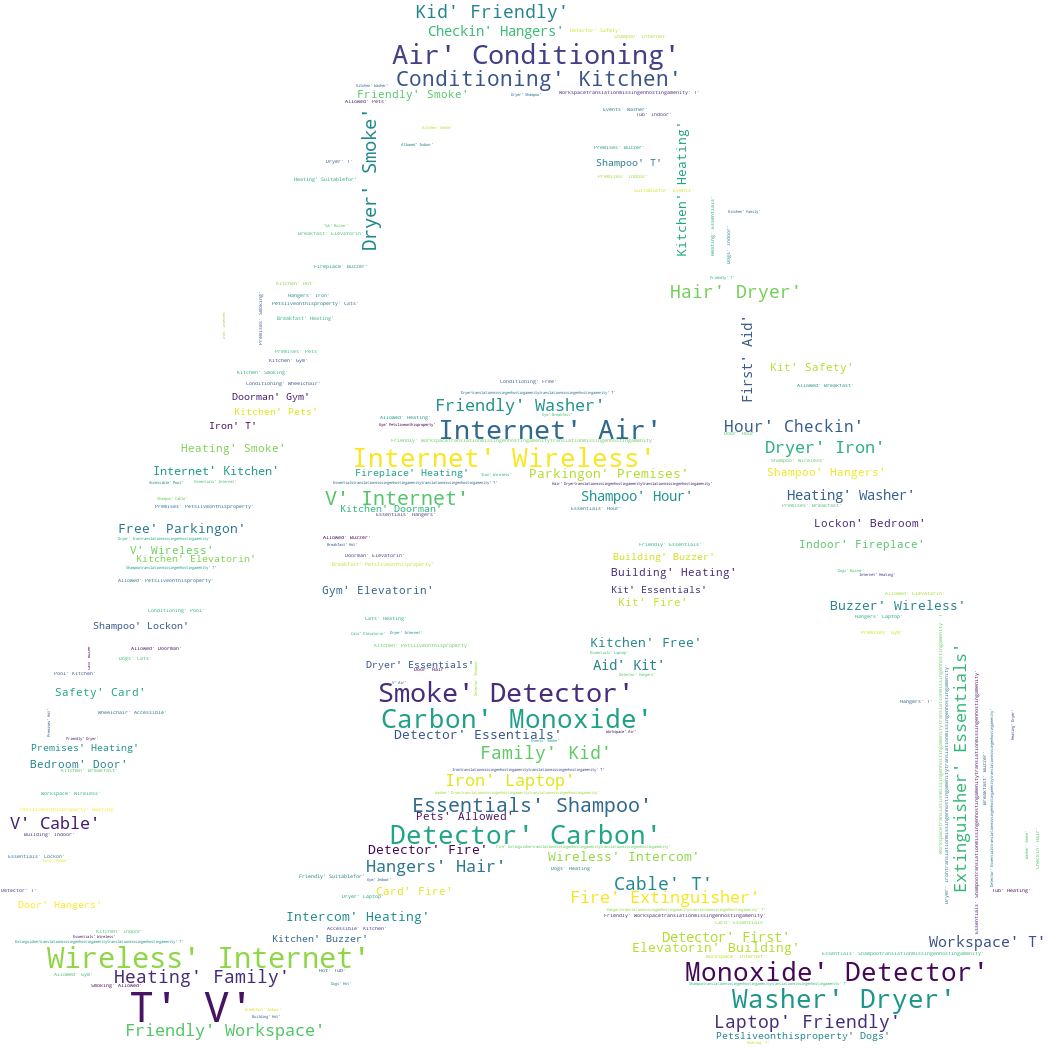

<Figure size 720x720 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10,10))
Image.open("/content/amenities_list17.png")

####*Here I filtered down the **data** dataframe to a smaller dataframe made up of the choosen  columns.*

In [ ]:
data2= data[['neighbourhood','property_type', 'room_type', 'accommodates',
             'bathrooms', 'bedrooms', 'beds','review_scores_rating','review_scores_cleanliness', 'price']]


In [ ]:
data2.head()

,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_cleanliness,price
0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,NaN,NaN,$250.00
1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,94.0,9.0,$65.00
2,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,98.0,9.0,$65.00
3,NaN,House,Private room,4,1.0,1.0,2.0,100.0,10.0,$75.00
4,Roslindale,House,Private room,2,1.5,1.0,2.0,99.0,10.0,$79.00


#### *Here we replaced nan values of the respective columns*

In [ ]:
data2['neighbourhood'].fillna('Not_Stated',inplace=True)
data2['review_scores_rating'].fillna(data2['review_scores_rating'].median(),inplace=True)
data2['review_scores_cleanliness'].fillna(data2['review_scores_cleanliness'].median(),inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### *Here I replaced the $ signs*

In [ ]:
data2['price']= data2.loc[:,'price'].str.replace('$','')
data2["price"] = [float(str(i).replace(",", "")) for i in data2["price"]]
data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_cleanliness,price
0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,94.0,10.0,250.0
1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,94.0,9.0,65.0
2,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,98.0,9.0,65.0
3,Not_Stated,House,Private room,4,1.0,1.0,2.0,100.0,10.0,75.0
4,Roslindale,House,Private room,2,1.5,1.0,2.0,99.0,10.0,79.0


#### *Here we take the correlation of medians of the appropriate columns  and visualize the correlatin with a heatmap*

In [ ]:
df_gp = data2.groupby('property_type')
df_gp.median().corr()


,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_cleanliness,price
accommodates,1.000000,-0.675545,-0.001947,0.869590,0.043882,-0.381843,0.172374
bathrooms,-0.675545,1.000000,0.661831,-0.428958,0.015466,-0.115728,0.375044
bedrooms,-0.001947,0.661831,1.000000,0.311150,0.235077,-0.454270,0.746327
beds,0.869590,-0.428958,0.311150,1.000000,0.009683,-0.595708,0.296458
review_scores_rating,0.043882,0.015466,0.235077,0.009683,1.000000,0.510114,0.486816
review_scores_cleanliness,-0.381843,-0.115728,-0.454270,-0.595708,0.510114,1.000000,-0.260565
price,0.172374,0.375044,0.746327,0.296458,0.486816,-0.260565,1.000000


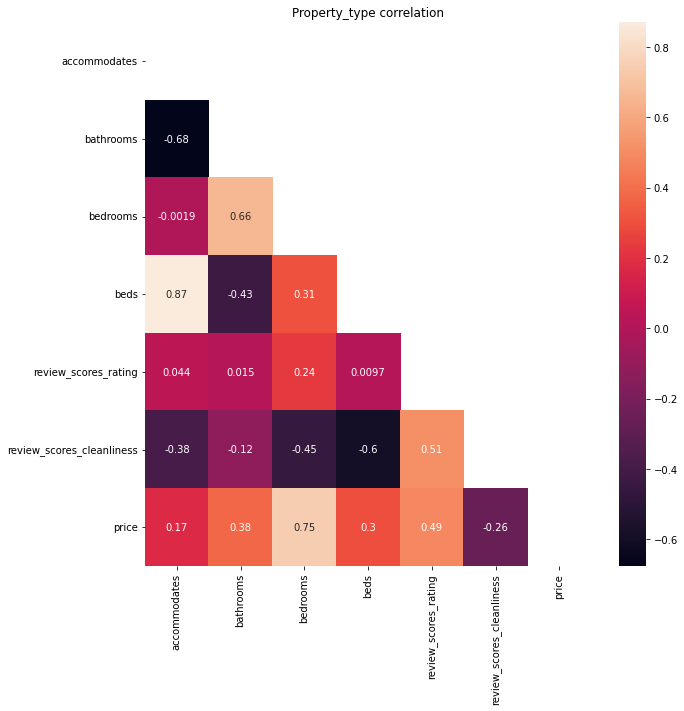

In [ ]:
mask = np.zeros_like(df_gp.median().corr())
tri_fil = np.triu_indices_from(mask)
mask[tri_fil] = True
ax = plt.figure(figsize=(10,10))
plt.title('Property_type correlation')
sns.heatmap(df_gp.median().corr(),mask=mask,annot=True);

### *Given the property type  what is the median price an owner can expected to charge?*

In [ ]:
data2.groupby(data2['property_type'])['price'].median().sort_values(ascending = False)

property_type
Guesthouse         289.0
Boat               262.5
Other              218.0
Villa              170.0
Loft               166.0
Condominium        160.0
Apartment          159.0
Entire Floor       126.5
Bed & Breakfast    100.0
Townhouse           99.0
House               84.5
Dorm                62.5
Camper/RV           60.0
Name: price, dtype: float64

#### *Given the number of bedrooms what is the median price can an owner can expected to receive?*

In [ ]:
data2.groupby(['bedrooms'])['price'].median()

bedrooms
0.0    150.0
1.0    103.0
2.0    249.0
3.0    279.0
4.0    375.0
5.0    341.5
Name: price, dtype: float64

In [ ]:
nu_list= list(set(data2['neighbourhood']))
nu_list

['Dorchester',
 'North End',
 'Theater District',
 'Back Bay',
 'Roxbury',
 'Downtown',
 'Cambridge',
 'Leather District',
 'Harvard Square',
 'Jamaica Plain',
 'Fenway/Kenmore',
 'Not_Stated',
 'Roslindale',
 'Allston-Brighton',
 'Mission Hill',
 'Brookline',
 'Chinatown',
 'Financial District',
 'East Boston',
 'Somerville',
 'Mattapan',
 'Hyde Park',
 'South Boston',
 'Chestnut Hill',
 'West Roxbury',
 'Charlestown',
 'Government Center',
 'Downtown Crossing',
 'West End',
 'South End',
 'Beacon Hill']

#### *Here I visualize the number of listing per neighborhood*

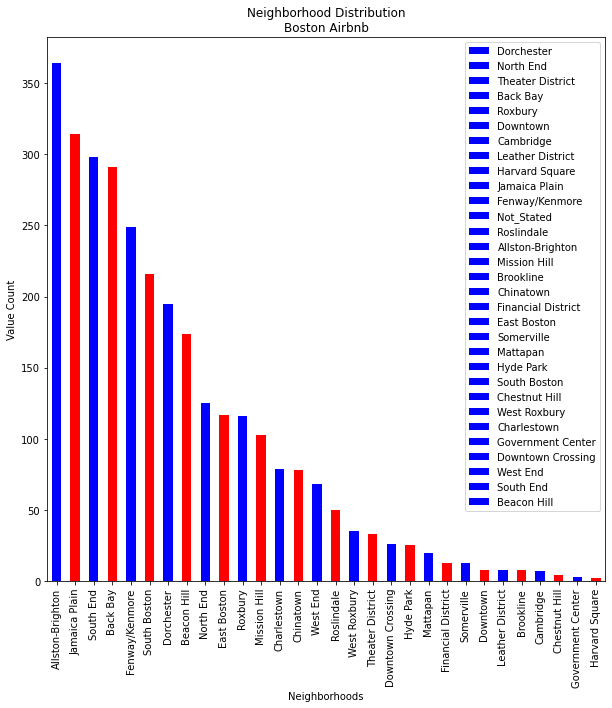

In [ ]:
from matplotlib.colors import Colormap
neigh_count=pd.value_counts(data['neighbourhood'].values, sort=True)
fig=plt.figure(figsize=(10,10))
for x in range(len(nu_list)):
  neigh_count.plot.bar(color=['blue','red'],label='label1')
plt.legend(nu_list);
plt.xlabel("Neighborhoods")
plt.ylabel("Value Count")
plt.title("Neighborhood Distribution\nBoston Airbnb");
